
<span style="font-family: Open Sans; font-weight: 800; font-size: 50px; font-style: normal; color:#2471A3; text-align:center;">

APRENDIZAJE DE MAQUINA I

</span>
<span style="font-family: Open Sans; font-weight: 600; font-size: 40px; font-style: normal; color:#2471A3; text-align:center">

TRABAJO PRACTICO INDIVIDUAL


</span>
<span style="font-family: Open Sans; font-weight: 300; font-size: 30px; font-style: normal">

<u>Alumno</u>: <span style="font-family: Open Sans; font-weight: 600; font-size: 35px; font-style: normal"> Juan Ignacio Ribet </span>

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 20px; font-style: normal">

### Consigna:

Una plataforma de ventas online nos contrata para que realicemos un modelo que nos
permita detectar un posible fraude dada cierta operación para ello contamos con un dataset
que contiene las siguientes columnas:

● Step: representa una unidad de tiempo donde 1 step equivale a 1 hora

● type: tipo de transacción en línea

● amount: el importe de la transacción

● nameOrig: cliente que inicia la transacción

● oldbalanceOrg: saldo antes de la transacción

● newbalanceOrig: saldo después de la transacción

● nameDest: destinatario de la transacción

● oldbalanceDest: saldo inicial del destinatario antes de la transacción

● newbalanceDest: el nuevo saldo del destinatario después de la transacción

● isFraud: transacción fraudulenta

Utilizando los modelos de clasificación vistos hasta el momento generar un notebook que
permita de ser posible resolver el problema que nos está planteando el cliente.
IMPORTANTE
Sabemos que por cada transacción aprobada el porcentaje de ganancia es de un
20%, y por cada fraude aprobado se pierde el 100% del dinero de la transacción.
Realizar un análisis y determinar un modelo que permita maximizar la ganancia de la
empresa.

</span>
<span style="font-family: Open Sans; font-weight: 400; font-size: 20px; font-style: normal">

</span>

In [1]:
# Importamos las librerias necesarias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import log10, floor

from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score, accuracy_score,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc, ConfusionMatrixDisplay


In [2]:
#Defino la variable de porcentaje de ganancia del 20% que usaremos durante el trabajo
porc_gan = 0.2

In [15]:
#Cargamos el dataset

data = pd.read_csv('archive\\PS_20174392719_1491204439457_log.csv', delimiter=',')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Verificamos si hay valores nulos 
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
#vemos que tipos de datos tiene el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [37]:

data[['nameOrig','nameDest']].value_counts()

nameOrig     nameDest   
C1000000639  C785826240     1
C356088257   C967127883     1
C356093795   C211587131     1
C356093623   M1772679046    1
C356093410   C794389882     1
                           ..
C1644856344  C1265550742    1
C1644855704  C145411360     1
C1644855688  M1054904036    1
C1644855515  C1627681910    1
C999999784   C1952034932    1
Name: count, Length: 6362620, dtype: int64

In [16]:
#Eliminamos las columnas que no nos brindan información para los objetivos planteados
data = data.drop(columns=['step','nameOrig','nameDest','isFlaggedFraud'])
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [39]:
data_type_isFraud = data.drop(columns=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])
data_type_isFraud.loc[:,'Fraud/NotFraud'] = np.where(data['isFraud'] == True, 'Fraud', 'NotFraud')
table = pd.pivot_table(data_type_isFraud, values='isFraud' , index=['type'], columns=['Fraud/NotFraud'], aggfunc='count', fill_value=0)
table.loc['Total']= table.sum()
table['Total'] = table.sum(axis=1)
table

Fraud/NotFraud,Fraud,NotFraud,Total
type,,,
CASH_IN,0,1399284,1399284
CASH_OUT,4116,2233384,2237500
DEBIT,0,41432,41432
PAYMENT,0,2151495,2151495
TRANSFER,4097,528812,532909
Total,8213,6354407,6362620


<span style="font-family: Open Sans; font-weight: 200; font-size: 25px; font-style: normal">

Se puede ver que las operaciones fraudulentas están en los tipos de transacción 'TRANSFER' y 'CASH_OUT' por lo que a fines de velocidad en el procesamiento y realizando un trabajo similar a lo visto en el paper (https://cs229.stanford.edu/proj2018/report/261.pdf) del TP grupal de la materia Introducción a la inteligencia Artificial vamos a armar un dataset que solo tenga estos dos tipos de transacción y probar los modelos con este dataset.

Si bien esta manera de trabajar no es del todo correcta ya que dejamos afuera tipos de transacciones que en el futuro pueden tener operaciones fraudulentas, segmentar mejora los resultados y velocidad de procesamiento. 


</span>

In [17]:
#Creamos un dataset que solo tenga los tipos de transacciones 'TRANSFER' y 'CASH_OUT'
df_TRANSFER_CASH_OUT = data[data['type'].isin(['TRANSFER','CASH_OUT'])]

In [18]:
#Creamos los dataset de features 'X' y target 'y'
X = df_TRANSFER_CASH_OUT.drop(columns=['isFraud'])
y = df_TRANSFER_CASH_OUT[['isFraud']]

In [19]:
# Dividimos el data set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y , test_size=0.30, random_state=42)


print('split TRANSFER')
print("X Train: ", X_train.shape)
print("Y Train: ", y_train.shape)
print("X Test: ", X_test.shape)
print("Y Test: ", y_test.shape)

split TRANSFER
X Train:  (1939286, 6)
Y Train:  (1939286, 1)
X Test:  (831123, 6)
Y Test:  (831123, 1)


In [20]:
#Verificamos que esta correctametne estratificado

print("Y Train Fraud %: ", ((y_train.value_counts()[1]/(y_train.value_counts()[1]+y_test.value_counts()[1]))*100).round(0))
print("Y Test Fraud %: ", ((y_test.value_counts()[1]/(y_train.value_counts()[1]+y_test.value_counts()[1]))*100).round(0))

y_train.value_counts()[1]+y_test.value_counts()[1]

Y Train Fraud %:  70.0
Y Test Fraud %:  30.0


8213

In [21]:
#Cambiamos los valores categoricos de la columna 'type': 
    #'CASH_OUT' = 0
    #'TRANSFER' = 1

X_train.loc[X_train['type']=='CASH_OUT', 'type'] = 0
X_test.loc[X_test['type']=='CASH_OUT', 'type'] = 0
X_train.loc[X_train['type']=='TRANSFER', 'type'] = 1
X_test.loc[X_test['type']=='TRANSFER', 'type'] = 1


In [23]:
# Escalamos los valores del dataset

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
# Generamos un data set de X_test e y_test que usaremos para optimizar el modelo y verificar las ganancias reales

df_test = X_test.copy().reset_index(drop=True)
df_test = df_test.join(y_test.copy().reset_index(drop=True))
df_test

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,3061.86,755.00,0.00,356184.57,359246.43,0
1,0,98800.37,10832.60,0.00,148640.03,247440.40,0
2,1,666604.74,12314.00,0.00,0.00,666604.74,0
3,0,256836.39,87066.00,0.00,1185958.00,1442794.39,0
4,0,240397.19,0.00,0.00,8019733.16,8260130.35,0
...,...,...,...,...,...,...,...
831118,0,82160.64,8563.62,0.00,846590.55,928751.19,0
831119,0,143801.03,0.00,0.00,411969.01,555770.03,0
831120,0,32366.06,35662.00,3295.94,470360.63,502726.69,0
831121,0,197981.97,0.00,0.00,242679.08,440661.05,0


In [29]:
#Calculamos la ganancia maxima posible con los valores del dataset de testing que seria el 20% de todas las transacciones no fraudulentas
gan_max_posible = (df_test[df_test['isFraud'] == 0]['amount'].sum()*porc_gan)
print('La maxima ganancia posible de df_test es: $', int(gan_max_posible))

La maxima ganancia posible de df_test es: $ 52176734236


<span style="font-family: Open Sans; font-weight: 200; font-size: 25px; font-style: normal">

Definimos algunos valores:

•	Ganancia máxima (gan_max_posible): es la ganancia que se obtendría si no tuviéramos falsos positivos ni falsos negativos. Es decir, el total de las transacciones no fraudulentas por el porcentaje de ganancia, en este caso 20%.

•	Ganancia bruta (gan_bruta_*): es la cantidad de multiplicar las transacciones no fraudulentas correctamente aprobadas por el porcentaje de ganancia.

•	Perdida (perdida_*): es la cantidad total de las transacciones erróneamente aprobadas (FN). 

•	Ganancia neta (gan_neta_*): es la ganancia bruta menos las pedidas.

•	Perdida de ganar (per_ganar_*): es la cantidad que se perdió de ganar por no aprobar transacciones no fraudulentas (FP). 

•	Porcentaje de ganancia (porc_gan_*): es el porcentaje de ganancia neta que se obtuvo en relación con la ganancia máxima posible. 


</span>

<span style="font-family: Open Sans; font-weight: 200; font-size: 25px; font-style: normal">
<u>Procedimiento</u>


Vamos a iterar con diferentes pesos de clases para poder determinar cuál es el peso que maximiza la ganancia de la empresa. Para eso en cada iteración calculamos la ganancia neta.

Luego entrenamos el modelo con el peso entre clases optimo, verificamos las métricas y evaluamos la ganancia.

Repetiremos este procedimiento con todos los modelos a evaluar.
</span>

In [65]:
columns = ['recall', 'precision', 'accuracy', 'FP', 'FN','gan_bruta', 'perdida', 'gan_neta', 'per_ganar', 'porc_gan']

# LogisticRegression

In [34]:
class_weight_list_lr = []

for i in np.linspace(0.5,60,120):
    lr = LogisticRegression(class_weight = {1:i} , random_state=42).fit(X_train_scaled, y_train)
    y_pred_lr =lr.predict(X_test_scaled)

    y_pred_lr_test = pd.DataFrame(y_pred_lr, columns=['pred'])
    df_Total_lr = df_test.join(y_pred_lr_test)

    gan_bruta_lr = df_Total_lr[(df_Total_lr['isFraud'] == False) & (df_Total_lr['pred'] == False)]['amount'].sum().round(0)*porc_gan
    perdida_lr = df_Total_lr[(df_Total_lr['isFraud'] == True) & (df_Total_lr['pred'] == False)]['amount'].sum().round(0)
    per_ganar_lr = df_Total_lr[(df_Total_lr['isFraud'] == False) & (df_Total_lr['pred'] == True)]['amount'].sum().round(0)*porc_gan

    gan_neta_lr = gan_bruta_lr - perdida_lr
     
    class_weight_list_lr.append([i,perdida_lr,per_ganar_lr,gan_neta_lr])

C_lr = np.array(class_weight_list_lr)

c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

In [31]:
best_class_weight_lr = C_lr[np.where(C_lr == max(C_lr[:, 3]))[0][0]][0]

print('Class_weight optimo es :', {1:best_class_weight_lr})
print('Ganancia Neta : $', int(C_lr[np.where(C_lr == max(C_lr[:, 3]))[0][0]][3]))

Class_weight optimo es : {1: 10.0}
Ganancia máxima : $ 51891533359


In [ ]:
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

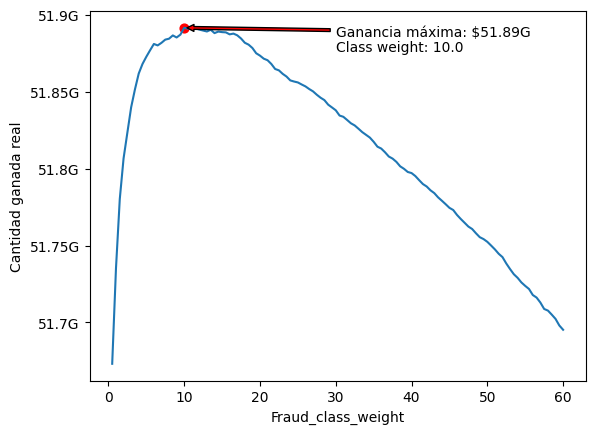

In [38]:
fig, ax = plt.subplots()
ax.plot(C_lr[:, 0], C_lr[:, 3])
ax.scatter(best_class_weight_lr, np.max(C_lr[:, 3]), c='red',s=40)
ax.set_xlabel('Fraud_class_weight')
ax.set_ylabel('Cantidad ganada real')
an1 = ax.annotate(f'Class weight: {C_lr[np.where(C_lr == max(C_lr[:, 3]))[0][0]][0]}'
            ,(best_class_weight_lr,np.max(C_lr[:, 3])), xytext=(30,(np.max(C_lr[:, 3]-0.0003*np.max(C_lr[:, 3])))), fontsize=10)
an2 = ax.annotate(f'Ganancia Neta: ${format_func(int(C_lr[np.where(C_lr == max(C_lr[:, 3]))[0][0]][3]))}'
            ,(best_class_weight_lr,np.max(C_lr[:, 3])), xytext=(30,np.max(C_lr[:, 3]-0.0001*np.max(C_lr[:, 3]))), 
                    fontsize=10, arrowprops=dict(arrowstyle='simple', facecolor='red'))

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()

In [48]:
#Entrenamos el modelo con el peso entre cale optimo para obtener la mayor ganancia

clf = LogisticRegression(class_weight = {1:best_class_weight_lr} , random_state=42).fit(X_train_scaled,y_train)

y_pred_lr =clf.predict(X_test_scaled)


c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall: 0.5612824675324676
Precision : 0.6338221814848762
Accuracy : 0.9977380002719213


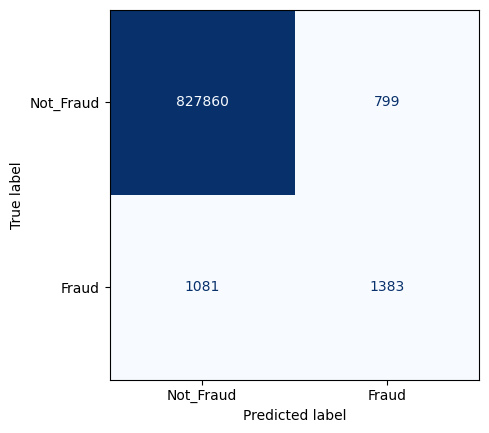

,recall,precision,accuracy,FP,FN
LR,0.561282,0.633822,0.997738,799.0,1081.0


In [64]:
#Evaluamos las metricas del modelo

recall_lr = recall_score(y_test, y_pred_lr)
precision_score_lr = precision_score(y_test, y_pred_lr)
accuracy_score_lr = accuracy_score(y_test,y_pred_lr)

print(f'Recall: {recall_lr}')
print(f'Precision : {precision_score_lr}')
print(f'Accuracy : {accuracy_score_lr}')

cm_lr = confusion_matrix(y_test, y_pred_lr, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Not_Fraud','Fraud'])
disp.plot(colorbar= False, cmap= 'Blues')
plt.show()



In [50]:
#Agregamos las predicciones al dataset de test

y_pred_lr_df = pd.DataFrame(y_pred_lr, columns=['pred'])
df_Total_lr = df_test.join(y_pred_lr_df)
df_Total_lr

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,pred
0,0,3061.86,755.00,0.00,356184.57,359246.43,0,0
1,0,98800.37,10832.60,0.00,148640.03,247440.40,0,0
2,1,666604.74,12314.00,0.00,0.00,666604.74,0,0
3,0,256836.39,87066.00,0.00,1185958.00,1442794.39,0,0
4,0,240397.19,0.00,0.00,8019733.16,8260130.35,0,0
...,...,...,...,...,...,...,...,...
831118,0,82160.64,8563.62,0.00,846590.55,928751.19,0,0
831119,0,143801.03,0.00,0.00,411969.01,555770.03,0,0
831120,0,32366.06,35662.00,3295.94,470360.63,502726.69,0,0
831121,0,197981.97,0.00,0.00,242679.08,440661.05,0,0


In [53]:
#Verificamos las ganacias obtenidas

gan_bruta_lr = (df_Total_lr[(df_Total_lr['isFraud'] == False) & (df_Total_lr['pred'] == False)]['amount'].sum()*porc_gan).round(0)
perdida_lr = df_Total_lr[(df_Total_lr['isFraud'] == True) & (df_Total_lr['pred'] == False)]['amount'].sum().round(0)
per_ganar_lr = df_Total_lr[(df_Total_lr['isFraud'] == False) & (df_Total_lr['pred'] == True)]['amount'].sum().round(0)*porc_gan

gan_neta_lr = (gan_bruta_lr - perdida_lr).round(0)
gan_real_lr = gan_bruta_lr - (perdida_lr + per_ganar_lr)
porc_gan_lr = (gan_neta_lr/gan_bruta_lr).round(4)*100

print('Gananacia Bruta = $', gan_bruta_lr)
print('Perdida = $', perdida_lr)
print('Gananacia Neta = $', gan_neta_lr)
print('Perdida de ganar = $', per_ganar_lr)
print('Porcentaje de ganancia = ',porc_gan_lr, '%')  


Gananacia Bruta = $ 52098096516.0
Perdida = $ 206563157.0
Gananacia Neta = $ 51891533359.0
Perdida de ganar = $ 78637720.0
Porcentaje de ganancia =  99.6 %


[52098096516.0, 206563157.0, 51891533359.0, 78637720.0, 99.6]

In [73]:
metricas_lr = np.array([[recall_lr, precision_score_lr,  accuracy_score_lr, cm_lr[0][1], cm_lr[1][0], gan_bruta_lr,
                         perdida_lr, gan_neta_lr, per_ganar_lr,porc_gan_lr]])
metricas_lr = pd.DataFrame(data=metricas_lr, columns= columns, index=['LR'])
metricas_lr

,recall,precision,accuracy,FP,FN,gan_bruta,perdida,gan_neta,per_ganar,porc_gan
LR,0.561282,0.633822,0.997738,799.0,1081.0,5.209810e+10,206563157.0,5.189153e+10,78637720.0,99.6


# LogisticRegressionCV

In [258]:
class_weight_list_lrcv = []

for i in np.linspace(5,25,21):
    lrcv = LogisticRegressionCV(class_weight = {1:i} , random_state=42).fit(X_train_scaled, y_train)
    y_pred_lrcv =lrcv.predict(X_test_scaled)

    y_pred_lrcv_test = pd.DataFrame(y_pred_lrcv, columns=['pred'])
    df_Total_lrcv = df_test.join(y_pred_lrcv_test)

    gan_bruta_lrcv = df_Total_lrcv[(df_Total_lrcv['isFraud'] == False) & (df_Total_lrcv['pred'] == False)]['amount'].sum().round(0)*porc_gan
    perdida_lrcv = df_Total_lrcv[(df_Total_lrcv['isFraud'] == True) & (df_Total_lrcv['pred'] == False)]['amount'].sum().round(0)
    per_ganar_lrcv = df_Total_lrcv[(df_Total_lrcv['isFraud'] == False) & (df_Total_lrcv['pred'] == True)]['amount'].sum().round(0)*porc_gan

    gan_neta_lrcv = gan_bruta_lrcv - perdida_lrcv
     
    class_weight_list_lrcv.append([i,perdida_lrcv,per_ganar_lrcv,gan_neta_lrcv])

C_lrcv = np.array(class_weight_list_lrcv)

c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

In [259]:
best_class_weight_lrcv = C_lrcv[np.where(C_lrcv == max(C_lrcv[:, 3]))[0][0]][0]

print('Class_weight optimo es :', {1:best_class_weight_lrcv})
print('Ganancia máxima : $', int(C_lrcv[np.where(C_lrcv == max(C_lrcv[:, 3]))[0][0]][3]))

Class_weight optimo es : {1: 14.0}
Ganancia máxima : $ 51752135349


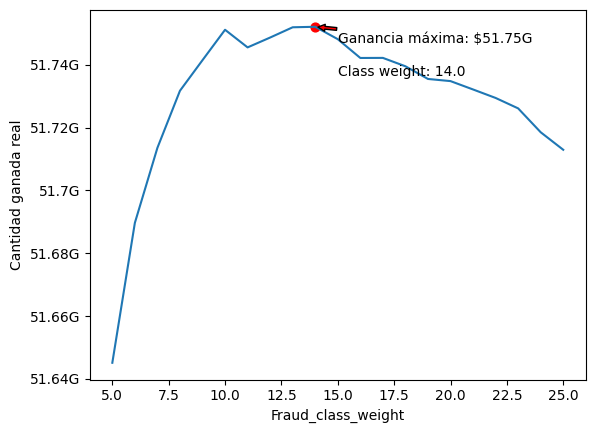

In [260]:
fig, ax = plt.subplots()
ax.plot(C_lrcv[:, 0], C_lrcv[:, 3])
ax.scatter(best_class_weight_lrcv, np.max(C_lrcv[:, 3]), c='red',s=40)
ax.set_xlabel('Fraud_class_weight')
ax.set_ylabel('Cantidad ganada real')
an1 = ax.annotate(f'Class weight: {C_lrcv[np.where(C_lrcv == max(C_lrcv[:, 3]))[0][0]][0]}'
            ,(best_class_weight_lrcv,np.max(C_lrcv[:, 3])), xytext=(15,(np.max(C_lrcv[:, 3]-0.0003*np.max(C_lrcv[:, 3])))), fontsize=10)
an2 = ax.annotate(f'Ganancia máxima: ${format_func(int(C_lrcv[np.where(C_lrcv == max(C_lrcv[:, 3]))[0][0]][3]))}'
            ,(best_class_weight_lrcv,np.max(C_lrcv[:, 3])), xytext=(15,np.max(C_lrcv[:, 3]-0.0001*np.max(C_lrcv[:, 3]))), 
                    fontsize=10, arrowprops=dict(arrowstyle='simple', facecolor='red'))

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()

In [262]:
#Entrenamos el modelo con el peso entre cale optimo para obtener la mayor ganancia

lrcv = LogisticRegressionCV(class_weight = {1:best_class_weight_lrcv} , random_state=42).fit(X_train_scaled,y_train)

y_pred_lrcv =lrcv.predict(X_test_scaled)


c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall: 0.4212662337662338
Precision : 0.6479400749063671
Accuracy : 0.9976056492240017


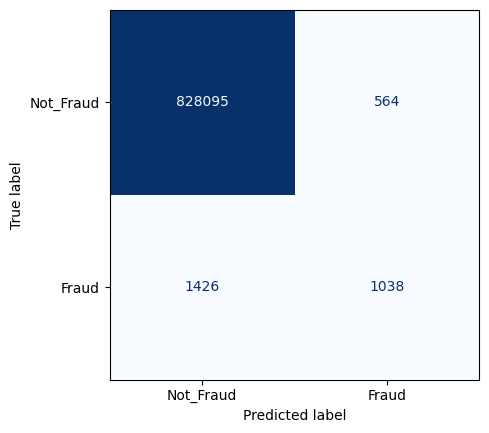

In [263]:
#Evaluamos las metricas del modelo

recall_lrcv = recall_score(y_test, y_pred_lrcv)
precision_score_lrcv = precision_score(y_test, y_pred_lrcv)
accuracy_score_lrcv = accuracy_score(y_test,y_pred_lrcv)

print(f'Recall: {recall_lrcv}')
print(f'Precision : {precision_score_lrcv}')
print(f'Accuracy : {accuracy_score_lrcv}')

cm_lrcv = confusion_matrix(y_test, y_pred_lrcv, labels=clf.classes_)
disp_lrcv = ConfusionMatrixDisplay(confusion_matrix=cm_lrcv, display_labels=['Not_Fraud','Fraud'])
disp_lrcv.plot(colorbar= False, cmap= 'Blues')
plt.show()



In [264]:
#Agregamos las predicciones al dataset de test

y_pred_lrcv_df = pd.DataFrame(y_pred_lrcv, columns=['pred'])
df_Total_lrcv = df_test.join(y_pred_lrcv_df)
df_Total_lrcv

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,pred
0,0,3061.86,755.00,0.00,356184.57,359246.43,0,0
1,0,98800.37,10832.60,0.00,148640.03,247440.40,0,0
2,1,666604.74,12314.00,0.00,0.00,666604.74,0,0
3,0,256836.39,87066.00,0.00,1185958.00,1442794.39,0,0
4,0,240397.19,0.00,0.00,8019733.16,8260130.35,0,0
...,...,...,...,...,...,...,...,...
831118,0,82160.64,8563.62,0.00,846590.55,928751.19,0,0
831119,0,143801.03,0.00,0.00,411969.01,555770.03,0,0
831120,0,32366.06,35662.00,3295.94,470360.63,502726.69,0,0
831121,0,197981.97,0.00,0.00,242679.08,440661.05,0,0


In [265]:
#Verificamos las ganacias obtenidas

gan_bruta_lrcv = (df_Total_lrcv[(df_Total_lrcv['isFraud'] == False) & (df_Total_lrcv['pred'] == False)]['amount'].sum()*porc_gan).round(0)
perdida_lrcv = df_Total_lrcv[(df_Total_lrcv['isFraud'] == True) & (df_Total_lrcv['pred'] == False)]['amount'].sum().round(0)
per_ganar_lrcv = df_Total_lrcv[(df_Total_lrcv['isFraud'] == False) & (df_Total_lrcv['pred'] == True)]['amount'].sum().round(0)*porc_gan

gan_neta_lrcv = (gan_bruta_lrcv - perdida_lrcv).round(0)
gan_real_lrcv = gan_bruta_lrcv - (perdida_lrcv + per_ganar_lrcv)
porc_gan_lrcv = (gan_neta_lrcv/gan_bruta_lrcv).round(4)*100

print('Gananacia Bruta = $', gan_bruta_lrcv)
print('Perdida = $', perdida_lrcv)
print('Gananacia Neta = $', gan_neta_lrcv)
print('Perdida de ganar = $', per_ganar_lrcv)
print('Porcentaje de ganancia = ',porc_gan_lrcv, '%')  


Gananacia Bruta = $ 52063982101.0
Perdida = $ 311846751.0
Gananacia Neta = $ 51752135350.0
Perdida de ganar = $ 112752135.60000001
Porcentaje de ganancia =  99.4 %


In [266]:
metricas_lrcv = np.array([[recall_lrcv, precision_score_lrcv,  accuracy_score_lrcv, cm_lrcv[0][1], cm_lrcv[1][0], gan_bruta_lrcv,
                         perdida_lrcv, gan_neta_lrcv, per_ganar_lrcv,porc_gan_lrcv]])
metricas_lrcv = pd.DataFrame(data=metricas_lrcv, columns= columns, index=['LRCV'])
metricas_lrcv

,recall,precision,accuracy,FP,FN,gan_bruta,perdida,gan_neta,per_ganar,porc_gan
LRCV,0.421266,0.64794,0.997606,564.0,1426.0,5.206398e+10,311846751.0,5.175214e+10,112752135.6,99.4


# Random Forest Classifier

In [224]:
class_weight_list_rfc = []

for i in np.linspace(10,30,21):
    rfc = RandomForestClassifier(n_estimators = 50, class_weight = {1:i} , random_state=42).fit(X_train, y_train)
    y_pred_rfc =rfc.predict(X_test)

    y_pred_rfc_test = pd.DataFrame(y_pred_rfc, columns=['pred'])
    df_Total_rfc = df_test.join(y_pred_rfc_test)

    gan_bruta_rfc = df_Total_rfc[(df_Total_rfc['isFraud'] == False) & (df_Total_rfc['pred'] == False)]['amount'].sum().round(0)*porc_gan
    perdida_rfc = df_Total_rfc[(df_Total_rfc['isFraud'] == True) & (df_Total_rfc['pred'] == False)]['amount'].sum().round(0)
    per_ganar_rfc = df_Total_rfc[(df_Total_rfc['isFraud'] == False) & (df_Total_rfc['pred'] == True)]['amount'].sum().round(0)*porc_gan

    gan_neta_rfc = gan_bruta_rfc - perdida_rfc
     
    class_weight_list_rfc.append([i,perdida_rfc,per_ganar_rfc,gan_neta_rfc])

C_rfc = np.array(class_weight_list_rfc)

C:\Users\juani\AppData\Local\Temp\ipykernel_27592\2929409007.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(n_estimators = 50, class_weight = {1:i} , random_state=42).fit(X_train, y_train)
C:\Users\juani\AppData\Local\Temp\ipykernel_27592\2929409007.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(n_estimators = 50, class_weight = {1:i} , random_state=42).fit(X_train, y_train)
C:\Users\juani\AppData\Local\Temp\ipykernel_27592\2929409007.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(n_estimators = 50, class_weight = {1:i} , random_state=42).fit(X_train, y_train

In [226]:
best_class_weight_rfc = C_rfc[np.where(C_rfc == max(C_rfc[:, 3]))[0][0]][0]

print('Class_weight optimo es :', {1:best_class_weight_rfc})
print('Ganancia máxima : $', int(C_rfc[np.where(C_rfc == max(C_rfc[:, 3]))[0][0]][3]))

Class_weight optimo es : {1: 17.0}
Ganancia máxima : $ 52090796675


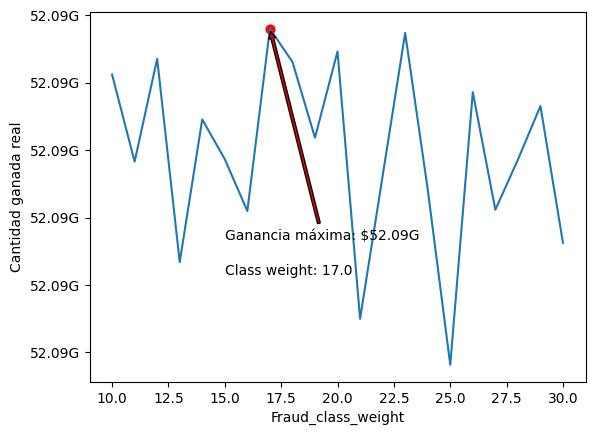

In [232]:
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

fig, ax = plt.subplots()
ax.plot(C_rfc[:, 0], C_rfc[:, 3])
ax.scatter(best_class_weight_rfc, np.max(C_rfc[:, 3]), c='red',s=40)
ax.set_xlabel('Fraud_class_weight')
ax.set_ylabel('Cantidad ganada real')
an1 = ax.annotate(f'Class weight: {C_rfc[np.where(C_rfc == max(C_rfc[:, 3]))[0][0]][0]}'
            ,(best_class_weight_rfc,np.max(C_rfc[:, 3])), xytext=(15,(np.max(C_rfc[:, 3]-0.00007*np.max(C_rfc[:, 3])))), fontsize=10)
an2 = ax.annotate(f'Ganancia máxima: ${format_func(int(C_rfc[np.where(C_rfc == max(C_rfc[:, 3]))[0][0]][3]))}'
            ,(best_class_weight_rfc,np.max(C_rfc[:, 3])), xytext=(15,np.max(C_rfc[:, 3]-0.00006*np.max(C_rfc[:, 3]))), 
                    fontsize=10, arrowprops=dict(arrowstyle='simple', facecolor='red'))

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()

In [233]:
#Entrenamos el modelo con el peso entre cale optimo para obtener la mayor ganancia

rfc = RandomForestClassifier(n_estimators = 50, class_weight = {1:best_class_weight_rfc} , random_state=42).fit(X_train, y_train)
y_pred_rfc =rfc.predict(X_test)

C:\Users\juani\AppData\Local\Temp\ipykernel_27592\3300389432.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(n_estimators = 50, class_weight = {1:best_class_weight_rfc} , random_state=42).fit(X_train, y_train)


Recall: 0.7840909090909091
Precision : 0.9679358717434869
Accuracy : 0.9992828979585452


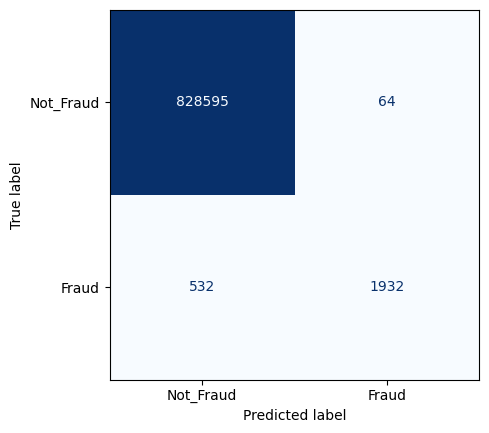

In [234]:
#Evaluamos las metricas del modelo

recall_rfc = recall_score(y_test, y_pred_rfc)
precision_score_rfc = precision_score(y_test, y_pred_rfc)
accuracy_score_rfc = accuracy_score(y_test,y_pred_rfc)

print(f'Recall: {recall_rfc}')
print(f'Precision : {precision_score_rfc}')
print(f'Accuracy : {accuracy_score_rfc}')

cm_rfc = confusion_matrix(y_test, y_pred_rfc, labels=clf.classes_)
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=['Not_Fraud','Fraud'])
disp_rfc.plot(colorbar= False, cmap= 'Blues')
plt.show()

In [235]:
#Agregamos las predicciones al dataset de test

y_pred_rfc_df = pd.DataFrame(y_pred_rfc, columns=['pred'])
df_Total_rfc = df_test.join(y_pred_rfc_df)
df_Total_rfc

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,pred
0,0,3061.86,755.00,0.00,356184.57,359246.43,0,0
1,0,98800.37,10832.60,0.00,148640.03,247440.40,0,0
2,1,666604.74,12314.00,0.00,0.00,666604.74,0,0
3,0,256836.39,87066.00,0.00,1185958.00,1442794.39,0,0
4,0,240397.19,0.00,0.00,8019733.16,8260130.35,0,0
...,...,...,...,...,...,...,...,...
831118,0,82160.64,8563.62,0.00,846590.55,928751.19,0,0
831119,0,143801.03,0.00,0.00,411969.01,555770.03,0,0
831120,0,32366.06,35662.00,3295.94,470360.63,502726.69,0,0
831121,0,197981.97,0.00,0.00,242679.08,440661.05,0,0


In [236]:
#Verificamos las ganacias obtenidas

gan_bruta_rfc = (df_Total_rfc[(df_Total_rfc['isFraud'] == False) & (df_Total_rfc['pred'] == False)]['amount'].sum()*porc_gan).round(0)
perdida_rfc = df_Total_rfc[(df_Total_rfc['isFraud'] == True) & (df_Total_rfc['pred'] == False)]['amount'].sum().round(0)
per_ganar_rfc = df_Total_rfc[(df_Total_rfc['isFraud'] == False) & (df_Total_rfc['pred'] == True)]['amount'].sum().round(0)*porc_gan

gan_neta_rfc = (gan_bruta_rfc - perdida_rfc).round(0)
gan_real_rfc = gan_bruta_rfc - (perdida_rfc + per_ganar_rfc)
porc_gan_rfc = (gan_neta_rfc/gan_bruta_rfc).round(4)*100

print('Gananacia Bruta = $', gan_bruta_rfc)
print('Perdida = $', perdida_rfc)
print('Gananacia Neta = $', gan_neta_rfc)
print('Coeficiente de ganancia = ',porc_gan_rfc, '%')  


Gananacia Bruta = $ 52172768432.0
Perdida = $ 81971756.0
Gananacia Neta = $ 52090796676.0
Coeficiente de ganancia =  99.83999999999999 %


In [72]:
metricas_rfc = np.array([[recall_rfc, precision_score_rfc,  accuracy_score_rfc, cm_rfc[0][1], cm_rfc[1][0], gan_bruta_rfc,
                         perdida_rfc, gan_neta_rfc, per_ganar_rfc,porc_gan_rfc]])
metricas_rfc = pd.DataFrame(data=metricas_rfc, columns= columns, index=['RFC'])
metricas_rfc

,recall,precision,accuracy,FP,FN,gan_bruta,perdida,gan_neta,per_ganar,porc_gan
RFC,0.784091,0.964553,0.999274,71.0,532.0,5.217264e+10,82183518.0,5.209046e+10,4090369.4,99.84


# Random Forest Regressor

In [75]:
rfr = RandomForestRegressor(n_estimators = 50, random_state = 42).fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test).round()

C:\Users\juani\AppData\Local\Temp\ipykernel_27592\539327869.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = RandomForestRegressor(n_estimators = 50, random_state = 42).fit(X_train, y_train)


Recall: 0.7840909090909091
Precision : 0.964553170244633
Accuracy : 0.9992744756191322


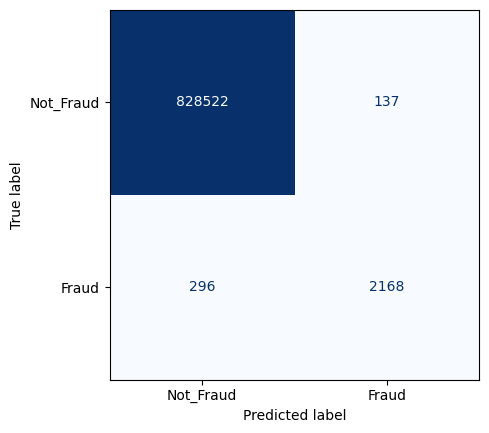

In [76]:
#Evaluamos las metricas del modelo

recall_rfr = recall_score(y_test, y_pred_rfc)
precision_score_rfr = precision_score(y_test, y_pred_rfc)
accuracy_score_rfr = accuracy_score(y_test,y_pred_rfc)

print(f'Recall: {recall_rfr}')
print(f'Precision : {precision_score_rfr}')
print(f'Accuracy : {accuracy_score_rfr}')

cm_rfr = confusion_matrix(y_test, y_pred_rfr, labels=clf.classes_)
disp_rfr = ConfusionMatrixDisplay(confusion_matrix=cm_rfr, display_labels=['Not_Fraud','Fraud'])
disp_rfr.plot(colorbar= False, cmap= 'Blues')
plt.show()


In [77]:
#Agregamos las predicciones al dataset de test

y_pred_rfr_df = pd.DataFrame(y_pred_rfr, columns=['pred'])
df_Total_rfr = df_test.join(y_pred_rfr_df)
df_Total_rfr

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,pred
0,0,3061.86,755.00,0.00,356184.57,359246.43,0,0.0
1,0,98800.37,10832.60,0.00,148640.03,247440.40,0,0.0
2,1,666604.74,12314.00,0.00,0.00,666604.74,0,0.0
3,0,256836.39,87066.00,0.00,1185958.00,1442794.39,0,0.0
4,0,240397.19,0.00,0.00,8019733.16,8260130.35,0,0.0
...,...,...,...,...,...,...,...,...
831118,0,82160.64,8563.62,0.00,846590.55,928751.19,0,0.0
831119,0,143801.03,0.00,0.00,411969.01,555770.03,0,0.0
831120,0,32366.06,35662.00,3295.94,470360.63,502726.69,0,0.0
831121,0,197981.97,0.00,0.00,242679.08,440661.05,0,0.0


In [78]:
#Verificamos las ganacias obtenidas

gan_bruta_rfr = (df_Total_rfr[(df_Total_rfr['isFraud'] == False) & (df_Total_rfr['pred'] == False)]['amount'].sum()*porc_gan).round(0)
perdida_rfr = df_Total_rfr[(df_Total_rfr['isFraud'] == True) & (df_Total_rfr['pred'] == False)]['amount'].sum().round(0)
per_ganar_rfr = df_Total_rfr[(df_Total_rfr['isFraud'] == False) & (df_Total_rfr['pred'] == True)]['amount'].sum().round(0)*porc_gan

gan_neta_rfr = (gan_bruta_rfr - perdida).round(0)
gan_real_rfr = gan_bruta_rfr - (perdida_rfr + per_ganar_rfr)
porc_gan_rfr = ((gan_neta_rfr/gan_bruta_rfr)*100).round(4)

print('Gananacia Bruta = $', gan_bruta_rfr)
print('Perdida = $', perdida_rfr)
print('Gananacia Neta = $', gan_neta_rfr)
print('Porcentaje de ganancia = ',porc_gan_rfr, '%') 

Gananacia Bruta = $ 52170579784.0
Perdida = $ 38224659.0
Gananacia Neta = $ 51964016627.0
Porcentaje de ganancia =  99.6041 %


In [80]:
metricas_rfr = np.array([[recall_rfr, precision_score_rfr,  accuracy_score_rfr, cm_rfr[0][1], cm_rfr[1][0], gan_bruta_rfr,
                         perdida_rfr, gan_neta_rfr, per_ganar_rfr,porc_gan_rfr]])
metricas_rfr = pd.DataFrame(data=metricas_rfr, columns= columns, index=['RFR'])
metricas_rfr

,recall,precision,accuracy,FP,FN,gan_bruta,perdida,gan_neta,per_ganar,porc_gan
RFR,0.784091,0.964553,0.999274,137.0,296.0,5.217058e+10,38224659.0,5.196402e+10,6154452.6,99.6041


# Linear SVC

In [242]:
class_weight_list_svm = []

for i in np.linspace(5,25,21):
    svm_model = LinearSVC(class_weight = {1:i}, random_state=42, max_iter=500).fit(X_train_scaled, y_train)
    y_pred_svm =svm_model.predict(X_test_scaled)

    y_pred_svm_test = pd.DataFrame(y_pred_svm, columns=['pred'])
    df_Total_svm = df_test.join(y_pred_svm_test)

    gan_bruta_svm  = df_Total_svm[(df_Total_svm['isFraud'] == False) & (df_Total_svm['pred'] == False)]['amount'].sum().round(0)*porc_gan
    perdida_svm  = df_Total_svm[(df_Total_svm['isFraud'] == True) & (df_Total_svm['pred'] == False)]['amount'].sum().round(0)
    per_ganar_svm  = df_Total_svm[(df_Total_svm['isFraud'] == False) & (df_Total_svm['pred'] == True)]['amount'].sum().round(0)*porc_gan

    gan_neta_svm  = gan_bruta_svm  - perdida_svm 
     
    class_weight_list_svm.append([i,perdida_svm,per_ganar_svm,gan_neta_svm])

C_svm = np.array(class_weight_list_svm)

c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje

In [243]:
C_svm = np.array(class_weight_list_svm)

In [244]:
best_class_weight_svm = C_svm[np.where(C_svm == max(C_svm[:, 3]))[0][0]][0]

print('Class_weight optimo es :', {1:best_class_weight_svm})
print('Ganancia máxima : $', int(C_svm[np.where(C_svm == max(C_svm[:, 3]))[0][0]][3]))

Class_weight optimo es : {1: 9.0}
Ganancia máxima : $ 51748118394


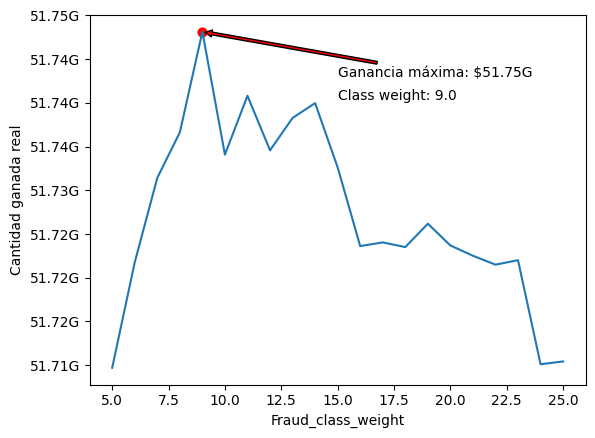

In [247]:
fig, ax = plt.subplots()
ax.plot(C_svm[:, 0], C_svm[:, 3])
ax.scatter(best_class_weight_svm, np.max(C_svm[:, 3]), c='red',s=40)
ax.set_xlabel('Fraud_class_weight')
ax.set_ylabel('Cantidad ganada real')
an1 = ax.annotate(f'Class weight: {C_svm[np.where(C_svm == max(C_svm[:, 3]))[0][0]][0]}'
            ,(best_class_weight_svm,np.max(C_svm[:, 3])), xytext=(15,(np.max(C_svm[:, 3]-0.00015*np.max(C_svm[:, 3])))), fontsize=10)
an2 = ax.annotate(f'Ganancia máxima: ${format_func(int(C_svm[np.where(C_svm == max(C_svm[:, 3]))[0][0]][3]))}'
            ,(best_class_weight_svm,np.max(C_svm[:, 3])), xytext=(15,np.max(C_svm[:, 3]-0.0001*np.max(C_svm[:, 3]))), 
                    fontsize=10, arrowprops=dict(arrowstyle='simple', facecolor='red'))

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()

In [249]:
#Entrenamos el modelo con el peso entre cale optimo para obtener la mayor ganancia
svm_model = LinearSVC(class_weight = {1:best_class_weight_svm}, random_state=42, max_iter=1000).fit(X_train_scaled, y_train)
y_pred_svm =svm_model.predict(X_test_scaled)


c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juani\Documents\Especializacion IA\Aprendizaje de Maquina I\aprendizaje_maquina_I\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Recall: 0.5097402597402597
Precision : 0.816114359974009
Accuracy : 0.9982060417050184


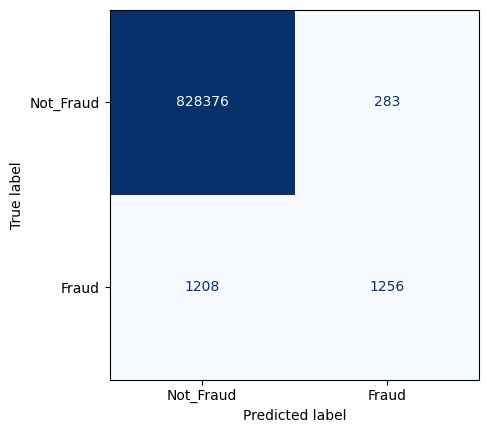

In [250]:
#Evaluamos las metricas del modelo

recall_svm = recall_score(y_test, y_pred_svm)
precision_score_svm = precision_score(y_test, y_pred_svm)
accuracy_score_svm = accuracy_score(y_test,y_pred_svm)

print(f'Recall: {recall_svm}')
print(f'Precision : {precision_score_svm}')
print(f'Accuracy : {accuracy_score_svm}')

cm_svm = confusion_matrix(y_test, y_pred_svm, labels=clf.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Not_Fraud','Fraud'])
disp_svm.plot(colorbar= False, cmap= 'Blues')
plt.show()

In [251]:
#Agregamos las predicciones al dataset de test

y_pred_svm_df = pd.DataFrame(y_pred_svm, columns=['pred'])
df_Total_svm = df_test.join(y_pred_svm_df)
df_Total_svm

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,pred
0,0,3061.86,755.00,0.00,356184.57,359246.43,0,0
1,0,98800.37,10832.60,0.00,148640.03,247440.40,0,0
2,1,666604.74,12314.00,0.00,0.00,666604.74,0,0
3,0,256836.39,87066.00,0.00,1185958.00,1442794.39,0,0
4,0,240397.19,0.00,0.00,8019733.16,8260130.35,0,0
...,...,...,...,...,...,...,...,...
831118,0,82160.64,8563.62,0.00,846590.55,928751.19,0,0
831119,0,143801.03,0.00,0.00,411969.01,555770.03,0,0
831120,0,32366.06,35662.00,3295.94,470360.63,502726.69,0,0
831121,0,197981.97,0.00,0.00,242679.08,440661.05,0,0


In [252]:
#Verificamos las ganacias obtenidas

gan_bruta_svm = (df_Total_svm[(df_Total_svm['isFraud'] == False) & (df_Total_svm['pred'] == False)]['amount'].sum()*porc_gan).round(0)
perdida_svm = df_Total_svm[(df_Total_svm['isFraud'] == True) & (df_Total_svm['pred'] == False)]['amount'].sum().round(0)
per_ganar_svm = df_Total_svm[(df_Total_svm['isFraud'] == False) & (df_Total_svm['pred'] == True)]['amount'].sum().round(0)*porc_gan

gan_neta_svm = (gan_bruta_svm - perdida_svm).round(0)
gan_real_svm = gan_bruta_svm - (perdida_svm + per_ganar_svm)
porc_gan_svm = ((gan_neta_svm/gan_bruta_svm)*100).round(4)

print('Gananacia Bruta = $', gan_bruta_svm)
print('Perdida = $', perdida_svm)
print('Gananacia Neta = $', gan_neta_svm)
print('Porcentaje de ganancia = ',porc_gan_svm, '%') 

Gananacia Bruta = $ 52138694880.0
Perdida = $ 358447820.0
Gananacia Neta = $ 51780247060.0
Porcentaje de ganancia =  99.3125 %


In [253]:
metricas_svm = np.array([[recall_svm, precision_score_svm,  accuracy_score_svm, cm_svm[0][1], cm_svm[1][0], gan_bruta_svm,
                         perdida_svm, gan_neta_svm, per_ganar_svm,porc_gan_svm]])
metricas_svm = pd.DataFrame(data=metricas_svm, columns= columns, index=['LSVC'])
metricas_svm

,recall,precision,accuracy,FP,FN,gan_bruta,perdida,gan_neta,per_ganar,porc_gan
LSVC,0.50974,0.816114,0.998206,283.0,1208.0,5.213869e+10,358447820.0,5.178025e+10,38039356.2,99.3125


# Comparación de resultados

In [267]:
metricas = pd.concat([metricas_lr,metricas_lrcv, metricas_rfc, metricas_rfr, metricas_svm])

In [268]:
metricas[['gan_bruta', 'perdida', 'gan_neta', 'per_ganar']] = metricas[['gan_bruta', 'perdida', 'gan_neta', 'per_ganar']].apply(lambda x: round(x/1000000, 2))
metricas

,recall,precision,accuracy,FP,FN,gan_bruta,perdida,gan_neta,per_ganar,porc_gan
LR,0.561282,0.633822,0.997738,799.0,1081.0,52098.10,206.56,51891.53,78.64,99.6000
LRCV,0.421266,0.647940,0.997606,564.0,1426.0,52063.98,311.85,51752.14,112.75,99.4000
RFC,0.784091,0.964553,0.999274,71.0,532.0,52172.64,82.18,52090.46,4.09,99.8400
RFR,0.784091,0.964553,0.999274,137.0,296.0,52170.58,38.22,51964.02,6.15,99.6041
LSVC,0.509740,0.816114,0.998206,283.0,1208.0,52138.69,358.45,51780.25,38.04,99.3125


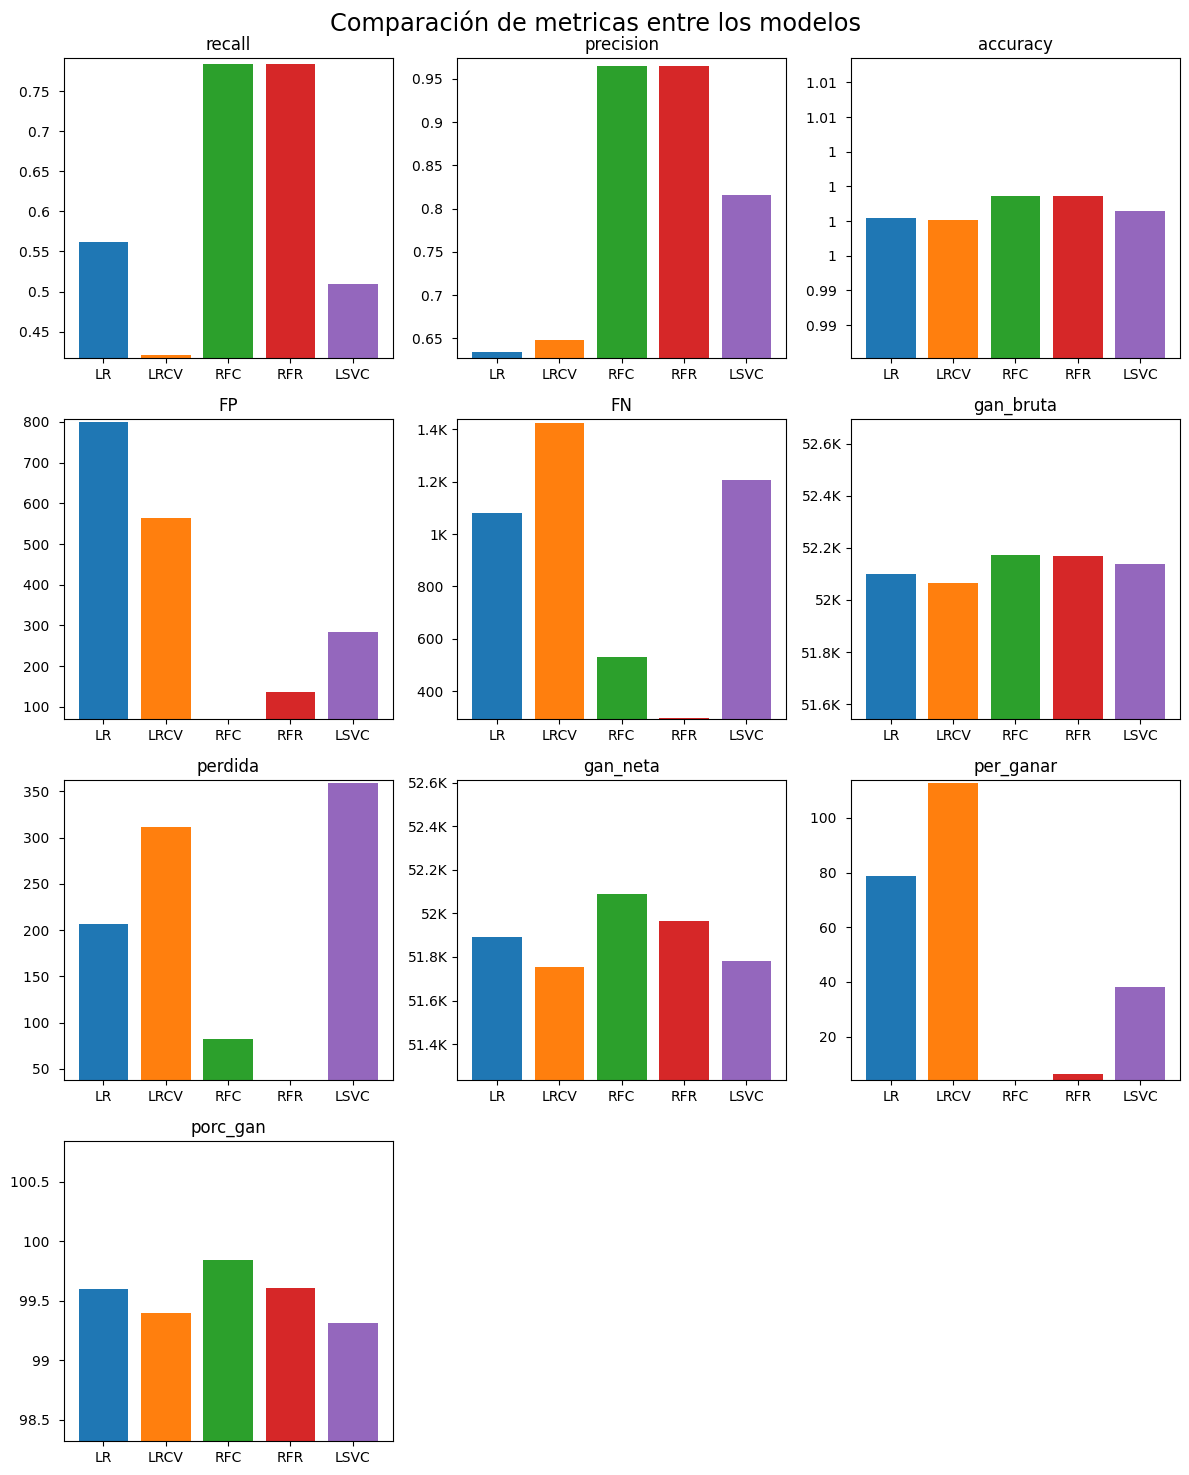

In [270]:
colors =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, axs = plt.subplots(4,3,figsize=(12, 15))
for ax, m in zip(axs.flat, metricas.columns):
    p = ax.bar(metricas.index, metricas[m], color=colors)
    ax.set_title(m)
    ax.set_ylim(bottom=(metricas[m].min()*0.99), top=(metricas[m].max()*1.01))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    #ax.bar_label(p, label_type='center')

for ax in axs.flat[len(metricas.columns):]:
    ax.remove()

fig.suptitle('Comparación de metricas entre los modelos', fontsize = 'xx-large')
fig.tight_layout()
plt.show()